In [171]:
#SETUP - RUN ME FIRST

import os
import collections
from collections import OrderedDict
from matplotlib.pyplot import figure
import operator

import matplotlib.pylab as plt
names = {}

folder = "names"
for each in os.listdir(folder):
    year = int(each[3:7])
    if year not in names:
        names[year] = {}
    else:
        print("wat?")
    file = open("names/"+each,"r")
    for line in file.readlines():
        
        split_line = line.split(",")
        
        name = split_line[0]
        gender = split_line[1]
        number = int(split_line[2])
        
        if name not in names[year]:
            names[year][name]={gender:number}
        else:   
            names[year][name][gender] = number
sortedNames = collections.OrderedDict(sorted(names.items(), key=lambda t: t[0]))

In [172]:
#EDIT ME 👇
male_names_to_plot = ["Grayson","Greyson"]
female_names_to_plot = []
#female_names_to_plot = ["Amanda","Sara","Sarah","Joyce","Liana","Brittney","Brittany"]
earliest_year_that_interests_me = 2000 #no earlier than 1880
last_year_that_interests_me = 2017 #no more recent than 2017
include_most_popular_male_names_from = True
include_most_popular_female_names_from = False
most_popular_names_from_year = 2010
#EDIT ME 👆
#RUN ME

In [173]:
#RUN ME

#MALES
if include_most_popular_male_names_from == True:
    all_male_name_numbers = []
    for each in names[most_popular_names_from_year]:
        try:
            all_male_name_numbers.append([each,names[most_popular_names_from_year][each]["M"]])
        except:
            pass
    all_male_name_numbers.sort(key=operator.itemgetter(1), reverse=True)
    most_popular_male_names_that_year = all_male_name_numbers[:3]
else:
    most_popular_male_names_that_year = []

#FEMALES
if include_most_popular_female_names_from == True:
    all_female_name_numbers = []
    for each in names[most_popular_names_from_year]:
        try:
            all_female_name_numbers.append([each,names[most_popular_names_from_year][each]["F"]])
        except:
            pass
    all_female_name_numbers.sort(key=operator.itemgetter(1), reverse=True)
    most_popular_female_names_that_year = all_female_name_numbers[:3]
else:
    most_popular_female_names_that_year = []

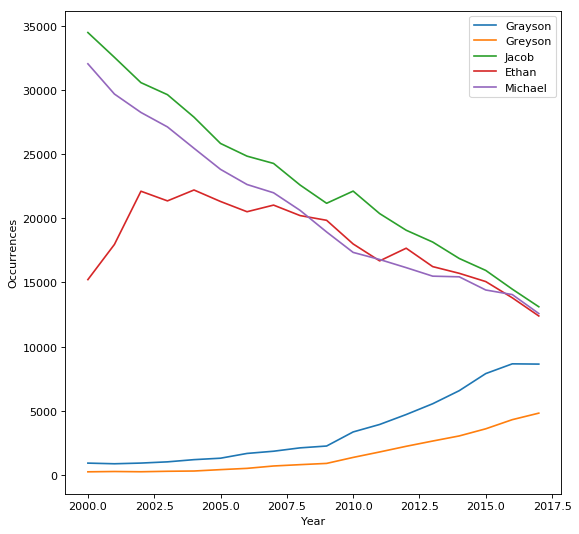

In [176]:
#NOW RUN ME
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
#plt.xlim(0,2017)
plt.ylabel('Occurrences')
#example
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
num_names = 0
pltlegend = []
pltlegend+=male_names_to_plot
for name in male_names_to_plot:
    all_tuples= []
    for each in sortedNames.keys():
        if (each <= last_year_that_interests_me) and (each >= earliest_year_that_interests_me):
            try:
                all_tuples.append((each,sortedNames[each][name]["M"]))
            except:
                all_tuples.append((each,0))
    plt.plot(*zip(*all_tuples), color='C'+str(num_names%10))
    num_names +=1
if include_most_popular_male_names_from == True:
    pltlegend+=[l[0] for l in most_popular_male_names_that_year]
    for name in most_popular_male_names_that_year:
        all_tuples= []
        for each in sortedNames.keys():
            if (each <= last_year_that_interests_me) and (each >= earliest_year_that_interests_me):
                try:
                    all_tuples.append((each,sortedNames[each][name[0]]["M"]))
                except:
                    all_tuples.append((each,0))
        plt.plot(*zip(*all_tuples), color='C'+str(num_names%10))
        num_names +=1

pltlegend+=female_names_to_plot
for name in female_names_to_plot:
    all_tuples= []
    for each in sortedNames.keys():
        if (each <= last_year_that_interests_me) and (each >= earliest_year_that_interests_me):
            try:
                all_tuples.append((each,sortedNames[each][name]["F"]))
            except:
                all_tuples.append((each,0))
    plt.plot(*zip(*all_tuples), color='C'+str(num_names%10))
    num_names +=1
    
if include_most_popular_female_names_from == True:
    pltlegend+=[l[0] for l in most_popular_female_names_that_year]
    for name in most_popular_female_names_that_year:
        all_tuples= []
        for each in sortedNames.keys():
            if (each <= last_year_that_interests_me) and (each >= earliest_year_that_interests_me):
                try:
                    all_tuples.append((each,sortedNames[each][name[0]]["F"]))
                except:
                    all_tuples.append((each,0))
        plt.plot(*zip(*all_tuples), color='C'+str(num_names%10))
        num_names +=1
plt.legend(pltlegend)
plt.show()

In [175]:
pltlegend

['Grayson', 'Greyson', 'Jacob', 'Ethan', 'Michael']